In [1]:
#data wrangling and visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Stats
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import scikit_posthocs as sp
from scipy.stats import kstest as KS
from scipy.stats import shapiro

%matplotlib inline

In [2]:
#Check for versions

import scipy
import sys

print(sys.version)
print('Pandas: ', pd.__version__)
print('Numpy: ', np.__version__)
print('Scikit_Posthocs: ', sp.__version__)
print('Scipy: ', scipy.__version__)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Pandas:  0.24.1
Numpy:  1.16.1
Scikit_Posthocs:  0.4.0
Scipy:  1.2.1


In [3]:
#Read in the data
data = pd.read_excel('Farmers training coding book.xlsx', na_values= 99)

In [4]:
#Check Read
data.head()

,VA,V1,V2,V3,V4,V5,V6,V7,V8,V9_1,...,P1,P2,P3,P4,P5,P6,P7,Perception,Knowledge,Practice
0,Ota,Yes,AFAN,NaN,51-60,Male,Subsistence farming,Yes,Yes,No,...,0,1,0,1,1,1,1,2.714286,6,5
1,Ota,Yes,Shalom c,No,41-50,Male,Commercial farming,Yes,Yes,No,...,1,0,0,0,1,1,1,2.714286,2,4
2,Ota,Yes,Shalom c,No,41-50,Male,Commercial farming,No,Yes,No,...,1,0,0,0,1,1,0,1.333333,2,3
3,Ota,Yes,AFAN,No,61 and above,Female,Commercial farming,Yes,Yes,No,...,0,1,1,0,1,1,1,1.857143,6,5
4,Ota,No,NaN,No,41-50,Male,Subsistence farming,No,Yes,No,...,1,0,0,0,1,1,1,3.166667,3,4


In [5]:
#Drop perception column
data.drop('Perception', axis=1, inplace=True)

### Farmer (Participants) Characterisitcs

In [6]:
#Percentage of responses from different trainings
print(data['VA'].value_counts())
print(data['VA'].value_counts(normalize=True) * 100)

Abeokuta    64
Ota         37
Name: VA, dtype: int64
Abeokuta    63.366337
Ota         36.633663
Name: VA, dtype: float64


In [7]:
#Sumamry statistics for some farmer characteristcs
cols =['V1','V3','V4', 'V5', 'V6', 'V7','V28']
labels=['Farmers Asscoaiton', 'Extesnsion Visit', 'Age Group', 'Gender', 'Farming Practice', 'Previous Training',
       'Multi-Cropping']
n=0
for i in cols:
    a=data[i].value_counts()
    b=data[i].value_counts(normalize=True)
    print(labels[n])
    print(a)
    print(b)
    print('---')
    n=n+1

Farmers Asscoaiton
Yes    77
No     22
Name: V1, dtype: int64
Yes    0.777778
No     0.222222
Name: V1, dtype: float64
---
Extesnsion Visit
No     63
Yes    31
Name: V3, dtype: int64
No     0.670213
Yes    0.329787
Name: V3, dtype: float64
---
Age Group
41-50           30
51-60           26
31-40           24
61 and above    17
20-30            3
below 20         1
Name: V4, dtype: int64
41-50           0.297030
51-60           0.257426
31-40           0.237624
61 and above    0.168317
20-30           0.029703
below 20        0.009901
Name: V4, dtype: float64
---
Gender
Male      80
Female    21
Name: V5, dtype: int64
Male      0.792079
Female    0.207921
Name: V5, dtype: float64
---
Farming Practice
Commercial farming     68
Subsistence farming    28
Name: V6, dtype: int64
Commercial farming     0.708333
Subsistence farming    0.291667
Name: V6, dtype: float64
---
Previous Training
Yes    60
No     39
Name: V7, dtype: int64
Yes    0.606061
No     0.393939
Name: V7, dtype: float64
---


In [8]:
# How long have participants being farming cassava
data['V30'].describe()

count    87.000000
mean     11.367816
std       9.310053
min       1.000000
25%       4.000000
50%      10.000000
75%      15.000000
max      40.000000
Name: V30, dtype: float64

In [9]:
data['V30'].agg('std')

9.310053259069722

In [10]:
# Of the commercial farmers, how do they sell
print('Processed')
print(data['V22_1'].value_counts())
print(data['V22_1'].value_counts(normalize=True))
print('---')
print('Tuber')
print(data['V22_2'].value_counts())
print(data['V22_2'].value_counts(normalize=True))

Processed
No     50
Yes    22
Name: V22_1, dtype: int64
No     0.694444
Yes    0.305556
Name: V22_1, dtype: float64
---
Tuber
Yes    78
No      8
Name: V22_2, dtype: int64
Yes    0.906977
No     0.093023
Name: V22_2, dtype: float64


In [11]:
# How long have study participants been growing cassava
data['V30'].describe()

count    87.000000
mean     11.367816
std       9.310053
min       1.000000
25%       4.000000
50%      10.000000
75%      15.000000
max      40.000000
Name: V30, dtype: float64

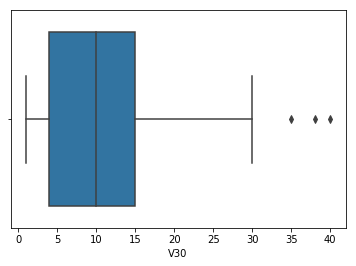

In [12]:
sns.boxplot(data['V30'])

In [13]:
#Years of practice by age group
data[['V4','V30']].groupby('V4')['V30'].agg(['count','mean', 'std'])

,count,mean,std
V4,,,
20-30,3,5.000000,4.582576
31-40,22,9.409091,8.033614
41-50,27,12.518519,8.902767
51-60,19,11.526316,9.558989
61 and above,15,13.866667,11.734361
below 20,1,2.000000,NaN


In [14]:
# What were the tubers most frequently processed into?
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [15]:
# Recast column to string data type
data['V23']= data['V23'].astype('str')

In [16]:
stopwords = set(STOPWORDS)
stopwords.update(['nan'])

In [17]:
#generate wordcloud 
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(' '.join(data['V23']))


Text(0.5, 1.0, 'What participants process cassava into')

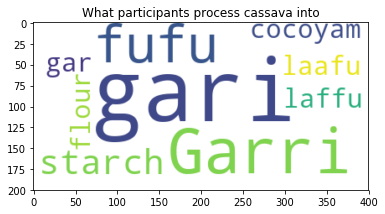

In [18]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('What participants process cassava into')

### a quick look at farmers who multicrop

In [19]:
print('Multicropping')
print(data['V28'].value_counts())
print(data['V28'].value_counts(normalize=True))

Multicropping
Yes    68
No     25
Name: V28, dtype: int64
Yes    0.731183
No     0.268817
Name: V28, dtype: float64


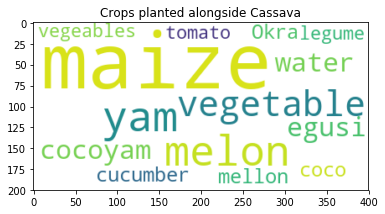

In [20]:
# Recast column to string data type
data['V29']= data['V29'].astype('str')

#generate wordcloud 
wordcloud2 = WordCloud(stopwords=stopwords, background_color='white').generate(' '.join(data['V29']))
plt.title('Crops planted alongside Cassava')

plt.imshow(wordcloud2, interpolation='bilinear')

## Do knowledge and practice scores come from a normal distribution?

In [21]:
# Check if Kowledge and Practice come from a normal distribution
# Shapiro-Wilk
print('Shapiro - Wilk Test')
print('---')
print('Knowledge: ', shapiro(data['Knowledge']))
print('Practice: ', shapiro(data['Practice']))


print()
#Kolmogorov-Smimov Test
print('Kolmogorov-Smimov Test')
print('---')
print('Knowledge: ', KS(data['Knowledge'], 'norm'))
print('Practice: ', KS(data['Practice'], 'norm'))

Shapiro - Wilk Test
---
Knowledge:  (0.9184457659721375, 1.0623140042298473e-05)
Practice:  (0.9060991406440735, 2.506153805370559e-06)

Kolmogorov-Smimov Test
---
Knowledge:  KstestResult(statistic=0.6109132343884545, pvalue=9.850865936069135e-37)
Practice:  KstestResult(statistic=0.9376459076557812, pvalue=3.82306384581559e-122)


Its safe to conclude that Knowledge and Practice Scores deviate from the normal

---

# Knowledge

In [22]:
data['Knowledge'].describe()

count    101.000000
mean       2.396040
std        1.959996
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        8.000000
Name: Knowledge, dtype: float64

### Do people who have seen the symptoms in their farms before know more than others?

In [23]:
print(data[['V8', 'Knowledge']].groupby('V8')['Knowledge'].agg(['mean','median','min','max']))
print(data[['V10', 'Knowledge']].groupby('V10')['Knowledge'].agg(['mean','median','min','max']))

         mean  median  min  max
V8                             
No   1.423077       1    0    5
Yes  2.770270       3    0    8
         mean  median  min  max
V10                            
No   1.793103       1    0    7
Yes  2.703125       3    0    8


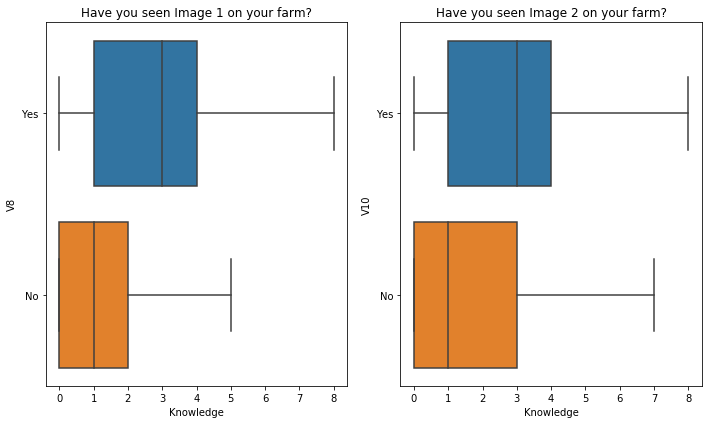

In [24]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data=data, x= data['Knowledge'], y=data['V8'])
plt.title('Have you seen Image 1 on your farm?')

plt.subplot(1,2,2)
sns.boxplot(data=data, x= data['Knowledge'], y=data['V10'])
plt.title('Have you seen Image 2 on your farm?')

plt.tight_layout()

In [25]:
#Create dummy varaibles from variables measuring if farmer has seen symptom
data['V8_dummy'] = data['V8'].apply(lambda x: 1 if x == 'Yes' else 0)
data['V10_dummy'] = data['V10'].apply(lambda x: 1 if x == 'Yes' else 0)

#add both columns together to determine how many of the symptoms the farmer has seen
data['Symptom'] = data['V8_dummy'] + data['V10_dummy']

Text(0.5, 1.0, 'Number of symptoms seen')

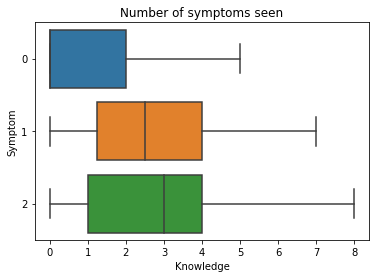

In [26]:
sns.boxplot(data=data, x= data['Knowledge'], y=data['Symptom'].astype('category'))
plt.title('Number of symptoms seen')

In [27]:
# descriptives for number of symptoms seen
data[['Knowledge', 'Symptom']].groupby('Symptom')['Knowledge'].agg(['count','mean','median','min','max'])

,count,mean,median,min,max
Symptom,,,,,
0,21,1.047619,0.0,0,5
1,22,2.818182,2.5,0,7
2,58,2.724138,3.0,0,8


In [28]:
# percentage of persons in relation to how many symptoms they have seen
data['Symptom'].value_counts(normalize=True)

2    0.574257
1    0.217822
0    0.207921
Name: Symptom, dtype: float64

In [29]:
# Does Knowledge score differ between persons who have see 1 vs 2 symptoms
stat, p = mannwhitneyu(data.loc[data['Symptom'] == 1, 'Knowledge'], 
                       data.loc[data['Symptom'] == 2, 'Knowledge']
                      )

print('Statistics=%.3f \n p=%.4f' % (stat, p))

Statistics=622.500 
 p=0.4349


#### it would seem that having seen the symptoms on one's farm is predictive of knowledge

Text(0.5, 1.0, 'Seen no Symptom')

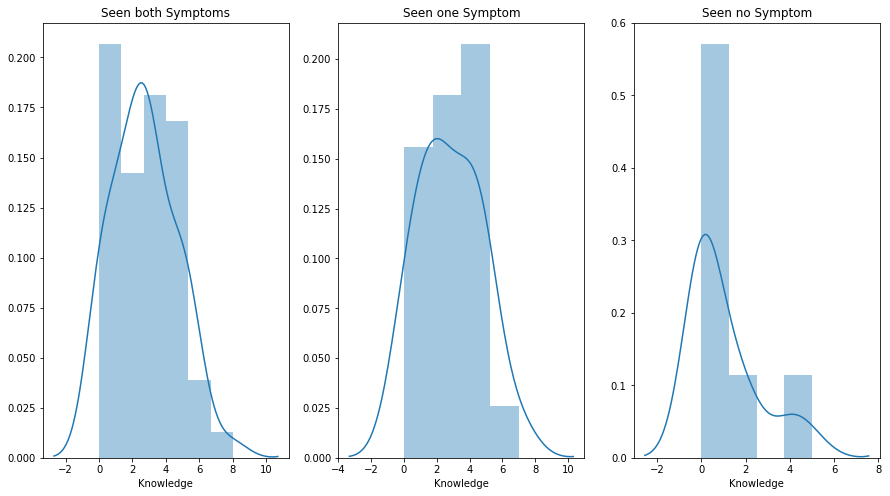

In [30]:
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
sns.distplot(data.loc[data['Symptom'] == 2, 'Knowledge'])
plt.title('Seen both Symptoms')

plt.subplot(1,3,2)
sns.distplot(data.loc[data['Symptom'] == 1, 'Knowledge'])
plt.title('Seen one Symptom')

plt.subplot(1,3,3)
sns.distplot(data.loc[data['Symptom'] == 0, 'Knowledge'])
plt.title('Seen no Symptom')

In [31]:
#Create column to check if participant has seen at least one symptom
data['Seen_One'] = data['Symptom'].apply(lambda x: 'Yes' if x >= 1 else 'No')

In [32]:
data[['Seen_One', 'Knowledge']].groupby('Seen_One')['Knowledge'].agg(['count', 'mean','std','median','min','max'])

,count,mean,std,median,min,max
Seen_One,,,,,,
No,21,1.047619,1.564487,0,0,5
Yes,80,2.750000,1.906020,3,0,8


In [33]:
#Percentage of those who have seen at least one of the symptoms
data['Seen_One'].value_counts(normalize=True)*100

Yes    79.207921
No     20.792079
Name: Seen_One, dtype: float64

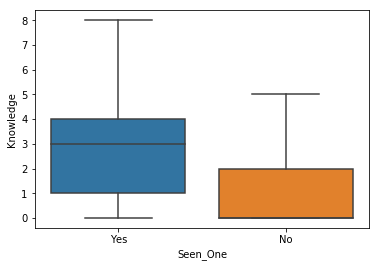

In [34]:
sns.boxplot(data=data, x='Seen_One', y= 'Knowledge')

In [35]:
# Are farmers who have seen at least one symptom in their farm more likely to know more
stat, p = mannwhitneyu(data.loc[data['Seen_One'] == 'Yes', 'Knowledge'], 
                       data.loc[data['Seen_One'] == 'No', 'Knowledge'], 
                       alternative='two-sided')

print('Statistics=%.3f \n p=%.4f' % (stat, p))

Statistics=1282.500 
 p=0.0002


In [36]:
# Is there a significant difference in the knowledge scores based on how many symptoms have been seen
stat, p = kruskal(data.loc[data['Symptom'] == 0, 'Knowledge'], 
                  data.loc[data['Symptom'] == 1, 'Knowledge'], 
                  data.loc[data['Symptom'] == 2, 'Knowledge']
                  )

print('Statistics=%.3f \n p=%.4f' % (stat, p))

Statistics=14.159 
 p=0.0008


In [37]:
x= [data.loc[data['Symptom'] == 0, 'Knowledge'], 
    data.loc[data['Symptom'] == 1, 'Knowledge'], 
    data.loc[data['Symptom'] == 2, 'Knowledge']]

(<matplotlib.axes._subplots.AxesSubplot at 0x22c62f5deb8>,
 <matplotlib.colorbar.ColorbarBase at 0x22c62fd9160>)

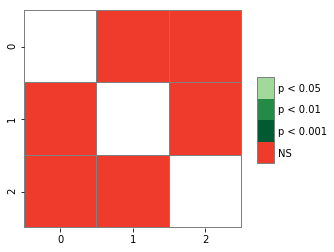

In [38]:
#post hoc with Conover test
pc = sp.posthoc_conover(x)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x22c62fe0c18>,
 <matplotlib.colorbar.ColorbarBase at 0x22c630594e0>)

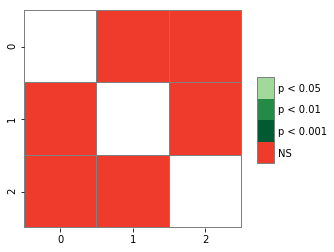

In [39]:
# Post hoc with mann whitney
pc2 = sp.posthoc_mannwhitney(x)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc2, **heatmap_args)

In [40]:
# Create knowledge bins
bins= [0,3,6,8]
labels= ['Low', 'Mid', 'High']
data['Knowledge_bin'] = pd.cut(data['Knowledge'], bins=bins, labels= labels )

In [41]:
print(data['Knowledge_bin'].value_counts())
print(data['Knowledge_bin'].value_counts(normalize=True)*100)

Low     48
Mid     27
High     2
Name: Knowledge_bin, dtype: int64
Low     62.337662
Mid     35.064935
High     2.597403
Name: Knowledge_bin, dtype: float64


In [42]:
# What is the common perception about what causes mosaic and leaf distortion
cols = ['V9_1', 'V9_2', 'V9_3','V9_4','V9_5']
labels= ['Rain', 'Variety', 'Age', 'Virus', 'No Idea']
c=0
for i in cols:
    a= data[i].value_counts()
    b= data[i].value_counts(normalize=True)
    print(labels[c])
    print(a)
    print(b)
    print('')
    c=c+1

Rain
No     80
Yes    14
Name: V9_1, dtype: int64
No     0.851064
Yes    0.148936
Name: V9_1, dtype: float64

Variety
No     87
Yes     7
Name: V9_2, dtype: int64
No     0.925532
Yes    0.074468
Name: V9_2, dtype: float64

Age
No     79
Yes    15
Name: V9_3, dtype: int64
No     0.840426
Yes    0.159574
Name: V9_3, dtype: float64

Virus
No     63
Yes    31
Name: V9_4, dtype: int64
No     0.670213
Yes    0.329787
Name: V9_4, dtype: float64

No Idea
No     48
Yes    46
Name: V9_5, dtype: int64
No     0.510638
Yes    0.489362
Name: V9_5, dtype: float64



In [43]:
# What is the common perception about what causes rottening of the tubers
cols = ['V11_1', 'V11_2', 'V11_3','V11_4','V11_5']
labels= ['Rain', 'Variety', 'Age', 'Virus', 'No Idea']
c=0
for i in cols:
    a= data[i].value_counts()
    b= data[i].value_counts(normalize=True)
    print(labels[c])
    print(a)
    print(b)
    print('')
    c=c+1

Rain
No     72
Yes    18
Name: V11_1, dtype: int64
No     0.8
Yes    0.2
Name: V11_1, dtype: float64

Variety
No     88
Yes     1
Name: V11_2, dtype: int64
No     0.988764
Yes    0.011236
Name: V11_2, dtype: float64

Age
No     82
Yes     7
Name: V11_3, dtype: int64
No     0.921348
Yes    0.078652
Name: V11_3, dtype: float64

Virus
No     57
Yes    32
Name: V11_4, dtype: int64
No     0.640449
Yes    0.359551
Name: V11_4, dtype: float64

No Idea
Yes    46
No     43
Name: V11_5, dtype: int64
Yes    0.516854
No     0.483146
Name: V11_5, dtype: float64



In [44]:
# Descriptives for some other knowledge questions
cols = ['V15', 'V16', 'V17','V18']
labels= ['Whitefly', 'Chemical Prevention', 'Burning', 'Rain']
c=0
for i in cols:
    a= data[i].value_counts()
    b= data[i].value_counts(normalize=True)
    print(labels[c])
    print(a)
    print(b)
    print('')
    c=c+1

Whitefly
I dont know    38
Yes            29
No             18
Name: V15, dtype: int64
I dont know    0.447059
Yes            0.341176
No             0.211765
Name: V15, dtype: float64

Chemical Prevention
Yes            55
I dont know    25
No             13
Name: V16, dtype: int64
Yes            0.591398
I dont know    0.268817
No             0.139785
Name: V16, dtype: float64

Burning
I dont know    33
Yes            30
No             24
Name: V17, dtype: int64
I dont know    0.379310
Yes            0.344828
No             0.275862
Name: V17, dtype: float64

Rain
I dont know    44
No             29
Yes            16
2               1
Name: V18, dtype: int64
I dont know    0.488889
No             0.322222
Yes            0.177778
2              0.011111
Name: V18, dtype: float64



In [45]:
data[['Knowledge','V30']].corr(method='spearman')

,Knowledge,V30
Knowledge,1.000000,0.293043
V30,0.293043,1.000000


---

# Practice

In [46]:
#Descriptive Stats for practice scores
data['Practice'].describe()

count    101.000000
mean       4.277228
std        1.304751
min        0.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Practice, dtype: float64

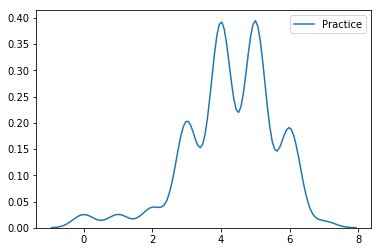

In [47]:
#Distribution of practice scores
sns.kdeplot(data['Practice'])

In [48]:
#How many farmers use chemical to prevent CMD
print(data['V31'].value_counts())
print(data['V31'].value_counts(normalize=True) *100)

No     68
Yes    27
9       1
Name: V31, dtype: int64
No     70.833333
Yes    28.125000
9       1.041667
Name: V31, dtype: float64


In [49]:
#Clean up the wrongly coded value
data['V31'].replace(9, np.nan, inplace=True)

In [50]:
#How many farmers use chemical to prevent CMD
print(data['V31'].value_counts())
print(data['V31'].value_counts(normalize=True) *100)

No     68
Yes    27
Name: V31, dtype: int64
No     71.578947
Yes    28.421053
Name: V31, dtype: float64


In [51]:
#How many remove plants showing symptoms
data['V32'].value_counts()

No     49
Yes    42
9       3
Name: V32, dtype: int64

In [52]:
#Clean up the wrongly coded value
data['V32'].replace(9, np.nan, inplace=True)

In [53]:
#How many remove plants showing symptoms
print(data['V32'].value_counts())
print(data['V32'].value_counts(normalize=True) *100)

No     49
Yes    42
Name: V32, dtype: int64
No     53.846154
Yes    46.153846
Name: V32, dtype: float64


In [54]:
#of those who remove them, are they burnt
print(data['V33'][data['V32']=='Yes'].value_counts())
print(data['V33'][data['V32']=='Yes'].value_counts(normalize=True)*100)

No     21
Yes    21
Name: V33, dtype: int64
No     50.0
Yes    50.0
Name: V33, dtype: float64


In [55]:
#Do persons who remove infected plants have better knowledge
data[['V32','Knowledge']].groupby('V32')['Knowledge'].agg(['count','mean','std','median','min','max'])

,count,mean,std,median,min,max
V32,,,,,,
No,49,2.061224,1.663432,2,0,6
Yes,42,3.309524,1.981476,3,0,8


In [56]:
#Does knowledge differ based on whether or not a person removes infected plant
mannwhitneyu(data.loc[data['V32'] == 'Yes', 'Knowledge'],
             data.loc[data['V32'] == 'Yes', 'Knowledge'])

MannwhitneyuResult(statistic=882.0, pvalue=0.4981873937221385)

In [57]:
cols=['V34_1','V34_2','V34_3']
headers=['Reputable Source', 'Previous Planting Season', 'From Neighbouring farms']
j=0

for i in cols:
    print(headers[j])
    print(data[i].value_counts())
    print(data[i].value_counts(normalize=True)*100)
    print(" ")
    j=j+1

Reputable Source
No     59
Yes    37
Name: V34_1, dtype: int64
No     61.458333
Yes    38.541667
Name: V34_1, dtype: float64
 
Previous Planting Season
No     56
Yes    40
Name: V34_2, dtype: int64
No     58.333333
Yes    41.666667
Name: V34_2, dtype: float64
 
From Neighbouring farms
No     55
Yes    41
Name: V34_3, dtype: int64
No     57.291667
Yes    42.708333
Name: V34_3, dtype: float64
 


In [58]:
#How many farmers had obtained cuttings from otuside their state
print(data['V35'].value_counts())
print(data['V35'].value_counts(normalize=True)*100)

No     83
Yes    15
Name: V35, dtype: int64
No     84.693878
Yes    15.306122
Name: V35, dtype: float64


In [59]:
data['V36'].value_counts()

0             3
oyo state     2
2             2
Oyo state     1
ogun          1
3             1
osun state    1
1             1
IITA          1
igbo-ora      1
Name: V36, dtype: int64

In [60]:
#How many farmers had obtained cuttings from otuside their country
print(data['V37'].value_counts())
print(data['V37'].value_counts(normalize=True)*100)

No     95
Yes     1
Name: V37, dtype: int64
No     98.958333
Yes     1.041667
Name: V37, dtype: float64


In [61]:
data['V38'].value_counts()

Series([], Name: V38, dtype: int64)

#### Number of symptoms seen Vs Practice

In [62]:
data[['Symptom', 'Practice']].groupby('Symptom')['Practice'].agg(['count','mean','std','median','min','max'])

,count,mean,std,median,min,max
Symptom,,,,,,
0,21,4.142857,1.621287,4.0,0,6
1,22,4.500000,1.144344,4.5,2,6
2,58,4.241379,1.246896,4.0,0,7


In [63]:
data[['Seen_One', 'Practice']].groupby('Seen_One')['Practice'].agg(['count','mean','std','median','min','max'])

,count,mean,std,median,min,max
Seen_One,,,,,,
No,21,4.142857,1.621287,4,0,6
Yes,80,4.312500,1.217943,4,0,7


In [64]:
#does seeing a symptoms previously affect practice scores
mannwhitneyu(data.loc[data['Seen_One']=='Yes', 'Practice'],
            data.loc[data['Seen_One']=='No', 'Practice'])

MannwhitneyuResult(statistic=837.0, pvalue=0.4913691469487441)

In [65]:
kruskal(data.loc[data['Symptom']== 0, 'Practice'],
       data.loc[data['Symptom']== 1, 'Practice'],
       data.loc[data['Symptom']== 2, 'Practice'])

KruskalResult(statistic=0.601092264776857, pvalue=0.7404137463157947)

---

# Knowledge/Practice and its Covariates

### Does belonging to a farmers association affect knowlege and practice?

In [66]:
#How many in each category
data['V1'].value_counts()

Yes    77
No     22
Name: V1, dtype: int64

In [67]:
data[['V1', 'Knowledge', 'Practice']].groupby('V1')['Knowledge','Practice'].agg(['count','mean','std'])

Knowledge                     Practice                    
        count      mean       std    count      mean       std
V1                                                            
No         22  2.090909  2.021529       22  4.000000  1.234427
Yes        77  2.532468  1.943846       77  4.363636  1.326938

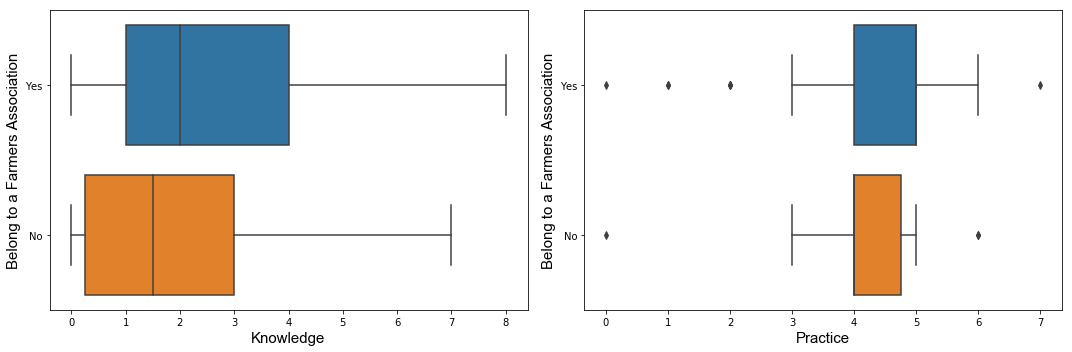

In [68]:
axis_font = {'fontname':'Arial', 'size':'15'}
plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=data, x= 'Knowledge', y='V1',orient='h')
plt.xlabel('Knowledge', **axis_font)
plt.ylabel('Belong to a Farmers Association', **axis_font)

plt.subplot(1,2,2)
sns.boxplot(data=data, x= 'Practice', y='V1', orient='h')
plt.xlabel('Practice', **axis_font)
plt.ylabel('Belong to a Farmers Association', **axis_font)

plt.tight_layout()

In [69]:
#Knowledge vs Farmers Assocaiton
stat, p = mannwhitneyu(data.loc[data['V1'] == 'Yes', 'Knowledge'], 
                       data.loc[data['V1'] == 'No', 'Knowledge'], 
                       alternative='two-sided')
print('Statistics=%.3f \n p=%.3f' % (stat, p))

#Practice vs Farmers Association
stat, p = mannwhitneyu(data.loc[data['V1'] == 'Yes', 'Practice'], 
                       data.loc[data['V1'] == 'No', 'Practice'],
                      alternative='two-sided')
print('Statistics=%.3f \n p=%.3f' % (stat, p))

Statistics=964.500 
 p=0.318
Statistics=1011.500 
 p=0.153


#### Belonging to a farmers association did not siginificantly increase farmer knowledge or practice

***

### How does previous extension officer visits affect dependent variables

In [70]:
#How many in each category
data['V3'].value_counts()

No     63
Yes    31
Name: V3, dtype: int64

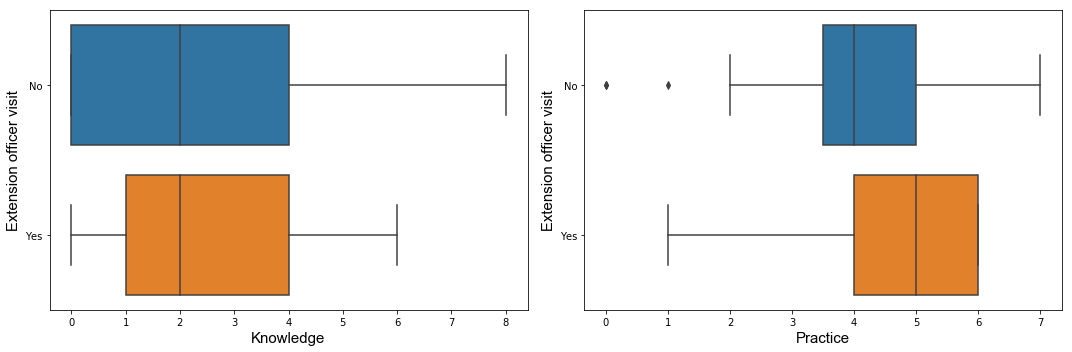

In [71]:
axis_font = {'fontname':'Arial', 'size':'15'}
plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=data, x= 'Knowledge', y='V3',orient='h')
plt.xlabel('Knowledge', **axis_font)
plt.ylabel('Extension officer visit', **axis_font)

plt.subplot(1,2,2)
sns.boxplot(data=data, x= 'Practice', y='V3', orient='h')
plt.xlabel('Practice', **axis_font)
plt.ylabel('Extension officer visit', **axis_font)

plt.tight_layout()

In [72]:
data[['V3', 'Knowledge', 'Practice']].groupby('V3')['Knowledge','Practice'].agg(['count','mean','std'])

Knowledge                     Practice                    
        count      mean       std    count      mean       std
V3                                                            
No         63  2.349206  2.072545       63  4.079365  1.311261
Yes        31  2.516129  1.710185       31  4.774194  1.257237

In [73]:
#Knowledge vs Extension Visit
stat, p = mannwhitneyu(data.loc[data['V3'] == 'Yes', 'Knowledge'], 
                       data.loc[data['V3'] == 'No', 'Knowledge'], 
                       alternative='two-sided')
print('Statistics=%.3f \n p=%.3f' % (stat, p))

#Practice vs Extesnion Visit
stat, p = mannwhitneyu(data.loc[data['V3'] == 'Yes', 'Practice'], 
                       data.loc[data['V3'] == 'No', 'Practice'],
                      alternative='two-sided')
print('Statistics=%.3f \n p=%.3f' % (stat, p))

Statistics=1049.500 
 p=0.554
Statistics=1315.500 
 p=0.005


#### It would seem that persons who had been visited by extension officers were more likely to have better practice than those who had not. The same however cannot be said about knowledge

***

### Scores by Age Group

In [74]:
data[['V4', 'Knowledge', 'Practice']].groupby('V4')['Knowledge','Practice'].agg(['count','mean','std'])

Knowledge                     Practice                    
                 count      mean       std    count      mean       std
V4                                                                     
20-30                3  2.666667  2.081666        3  5.000000  1.000000
31-40               24  2.083333  1.886258       24  4.541667  0.883627
41-50               30  2.533333  1.655364       30  3.966667  1.542129
51-60               26  2.500000  2.158703       26  4.115385  1.395046
61 and above        17  2.117647  2.117851       17  4.470588  1.178858
below 20             1  7.000000       NaN        1  6.000000       NaN

In [75]:
stat, p = kruskal(data.loc[data['V4'] == '31-40', 'Knowledge'], 
                  data.loc[data['V4'] == '41-50', 'Knowledge'],
                  data.loc[data['V4'] == '51-60', 'Knowledge'],
                  data.loc[data['V4'] == '61 and above', 'Knowledge'],
                  data.loc[data['V4'] == '20-30', 'Knowledge'],
                  data.loc[data['V4'] == 'below 20', 'Knowledge'], 
                )
print('Statistics=%.3f \n p=%.3f' % (stat, p))

stat, p = kruskal(data.loc[data['V4'] == '31-40', 'Practice'], 
                  data.loc[data['V4'] == '41-50', 'Practice'],
                  data.loc[data['V4'] == '51-60', 'Practice'],
                  data.loc[data['V4'] == '61 and above', 'Practice'],
                  data.loc[data['V4'] == '20-30', 'Practice'],
                  data.loc[data['V4'] == 'below 20', 'Practice'],
                 )
print('Statistics=%.3f \n p=%.3f' % (stat, p))

Statistics=4.313 
 p=0.505
Statistics=6.154 
 p=0.292


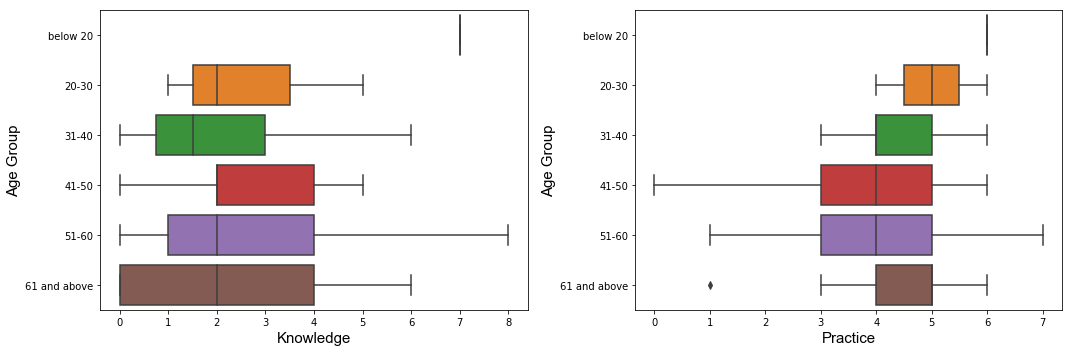

In [76]:
order = ['below 20', '20-30','31-40','41-50','51-60','61 and above']
axis_font = {'fontname':'Arial', 'size':'15'}
plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=data, x= 'Knowledge', y='V4',orient='h', order=order)
plt.xlabel('Knowledge', **axis_font)
plt.ylabel('Age Group', **axis_font)

plt.subplot(1,2,2)
sns.boxplot(data=data, x= 'Practice', y='V4', orient='h', order=order)
plt.xlabel('Practice', **axis_font)
plt.ylabel('Age Group', **axis_font)

plt.tight_layout()

***

### Gender versus dependent Variables

In [77]:
# Number of persons by sex
data['V5'].value_counts()

Male      80
Female    21
Name: V5, dtype: int64

In [78]:
#Average practice and knowledge score for each sex
data[['V5','Knowledge','Practice']].groupby('V5')['Knowledge', 'Practice'].agg(['count','mean','std'])

Knowledge                     Practice                    
           count      mean       std    count      mean       std
V5                                                               
Female        21  2.428571  2.181088       21  4.333333  1.390444
Male          80  2.387500  1.912608       80  4.262500  1.290116

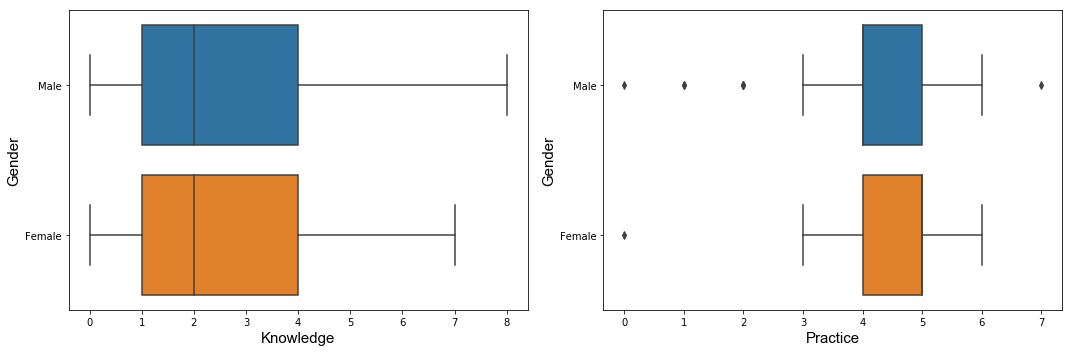

In [79]:
axis_font = {'fontname':'Arial', 'size':'15'}
plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=data, x= 'Knowledge', y='V5',orient='h')
plt.xlabel('Knowledge', **axis_font)
plt.ylabel('Gender', **axis_font)

plt.subplot(1,2,2)
sns.boxplot(data=data, x= 'Practice', y='V5', orient='h')
plt.xlabel('Practice', **axis_font)
plt.ylabel('Gender', **axis_font)

plt.tight_layout()

In [80]:
#Knowledge vs Gender
stat, p = mannwhitneyu(data.loc[data['V5'] == 'Male', 'Knowledge'], 
                       data.loc[data['V5'] == 'Female', 'Knowledge'], 
                       alternative='two-sided')
print('Statistics=%.3f \n p=%.3f' % (stat, p))

#Practice vs Gender
stat, p = mannwhitneyu(data.loc[data['V5'] == 'Male', 'Practice'], 
                       data.loc[data['V5'] == 'Female', 'Practice'],
                      alternative='two-sided')
print('Statistics=%.3f \n p=%.3f' % (stat, p))

Statistics=846.000 
 p=0.963
Statistics=782.500 
 p=0.622


***

### Type of farming vs Dependents

In [81]:
# How many per group
data['V6'].value_counts()

Commercial farming     68
Subsistence farming    28
Name: V6, dtype: int64

In [82]:
#Average practice and knowledge score for each group
data[['V6','Knowledge','Practice']].groupby('V6')['Knowledge', 'Practice'].agg(['count','mean','std'])

Knowledge                     Practice                    
                        count      mean       std    count      mean       std
V6                                                                            
Commercial farming         68  2.529412  1.927574       68  4.338235  1.241211
Subsistence farming        28  2.000000  1.825742       28  4.142857  1.325373

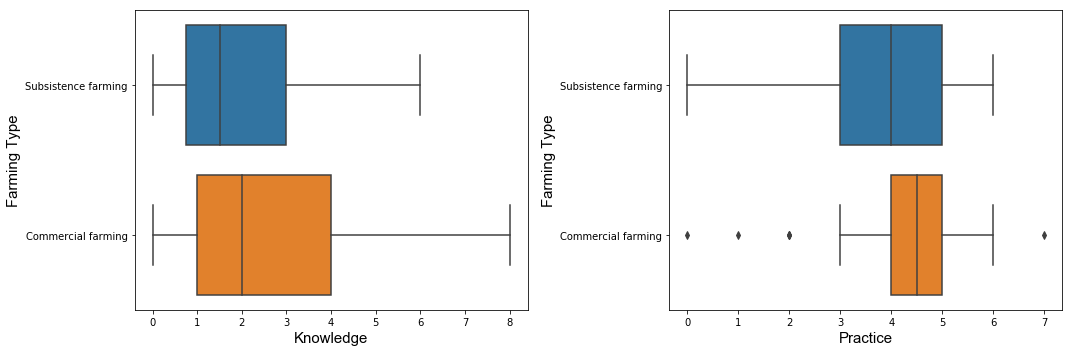

In [83]:
axis_font = {'fontname':'Arial', 'size':'15'}
plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=data, x= 'Knowledge', y='V6',orient='h')
plt.xlabel('Knowledge', **axis_font)
plt.ylabel('Farming Type', **axis_font)

plt.subplot(1,2,2)
sns.boxplot(data=data, x= 'Practice', y='V6', orient='h')
plt.xlabel('Practice', **axis_font)
plt.ylabel('Farming Type', **axis_font)

plt.tight_layout()

In [84]:
#Knowledge vs farming type
stat, p = mannwhitneyu(data.loc[data['V6'] == 'Commercial farming', 'Knowledge'], 
                       data.loc[data['V6'] == 'Subsistence farming', 'Knowledge'], 
                       alternative='two-sided')
print('Statistics=%.3f \n p=%.3f' % (stat, p))

#Practice vs farming type
stat, p = mannwhitneyu(data.loc[data['V6'] == 'Commercial farming', 'Practice'], 
                       data.loc[data['V6'] == 'Subsistence farming', 'Practice'],
                      alternative='two-sided')
print('Statistics=%.3f \n p=%.3f' % (stat, p))

Statistics=1101.500 
 p=0.223
Statistics=1058.000 
 p=0.378


***

### Previous training vs Dependents

In [85]:
# How many have attended farmers training before
data['V7'].value_counts()

Yes    60
No     39
Name: V7, dtype: int64

In [86]:
#Average practice and knowledge score for each group
data[['V7','Knowledge','Practice']].groupby('V7')['Knowledge', 'Practice'].agg(['count','mean','std'])

Knowledge                     Practice                    
        count      mean       std    count      mean       std
V7                                                            
No         39  1.743590  1.816850       39  4.025641  1.202786
Yes        60  2.733333  1.929843       60  4.400000  1.355466

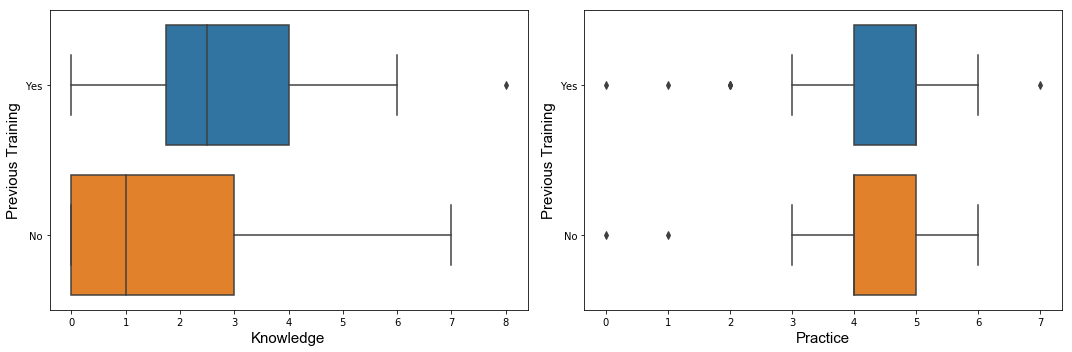

In [87]:
axis_font = {'fontname':'Arial', 'size':'15'}
plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=data, x= 'Knowledge', y='V7',orient='h')
plt.xlabel('Knowledge', **axis_font)
plt.ylabel('Previous Training', **axis_font)

plt.subplot(1,2,2)
sns.boxplot(data=data, x= 'Practice', y='V7', orient='h')
plt.xlabel('Practice', **axis_font)
plt.ylabel('Previous Training', **axis_font)

plt.tight_layout()

In [88]:
#Knowledge vs previous training
stat, p = mannwhitneyu(data.loc[data['V7'] == 'Yes', 'Knowledge'], 
                       data.loc[data['V7'] == 'No', 'Knowledge'], 
                       alternative='two-sided')
print('Statistics=%.3f \n p=%.3f' % (stat, p))

#Practice vs previous training
stat, p = mannwhitneyu(data.loc[data['V7'] == 'Yes', 'Practice'], 
                       data.loc[data['V7'] == 'No', 'Practice'],
                      alternative='two-sided')
print('Statistics=%.3f \n p=%.3f' % (stat, p))

Statistics=1521.500 
 p=0.011
Statistics=1413.000 
 p=0.072


### Are those in farmers association more likely to have attended trainings in the past

In [89]:
# Create crosstab of variables of interest
tab = pd.crosstab(data['V1'], data['V7'])

In [90]:
tab

V7,No,Yes
V1,,
No,15,7
Yes,22,53


In [91]:
from scipy.stats import chi2_contingency as chi2

In [92]:
chi2(tab)

(9.296329852579852,
 0.0022961339893910293,
 1,
 array([[ 8.39175258, 13.60824742],
        [28.60824742, 46.39175258]]))

#### Persons who belong to a farmers association are more likely to have attended a training before

### Are those visited by extension officers more likely to have attended trainings in the past

In [93]:
tab2 = pd.crosstab(data['V3'], data['V7'])
chi2(tab2)

(4.9685363289632605,
 0.025812482032974267,
 1,
 array([[24.65217391, 38.34782609],
        [11.34782609, 17.65217391]]))

#### Persons who have been visited by an extension officer were more likely to have attended a training before

***

# Distribution of correct responses

In [94]:
# How many persons got each knowledge question correct
knowledge_cols = ['K1','K2','K3','K4','K5','K6','K7','K8']
count=[]
percent=[]

for i in knowledge_cols:
    x= data[i].value_counts()[1]
    count.append(x)
    y= round((x/101)*100, 2)
    percent.append(y)

In [95]:
knowledge = pd.DataFrame(list(zip(knowledge_cols, count, percent)),
              columns=['Question','N', '%'])

In [96]:
knowledge

,Question,N,%
0,K1,31,30.69
1,K2,32,31.68
2,K3,51,50.50
3,K4,27,26.73
4,K5,29,28.71
5,K6,13,12.87
6,K7,30,29.70
7,K8,29,28.71


In [97]:
# How many persons got each practice question correct
practice_cols = ['P1','P2','P3','P4','P5','P6','P7']
count2=[]
percent2=[]

for i in practice_cols:
    x1= data[i].value_counts()[1]
    count2.append(x1)
    y1= round((x1/101)*100, 2)
    percent2.append(y1)

In [98]:
practice = pd.DataFrame(list(zip(practice_cols, count2, percent2)),
              columns=['Practice','N', '%'])

In [99]:
practice

,Practice,N,%
0,P1,68,67.33
1,P2,42,41.58
2,P3,25,24.75
3,P4,37,36.63
4,P5,83,82.18
5,P6,95,94.06
6,P7,82,81.19


# Relationship between Knowledge and Practice

In [100]:
spearmanr(data['Knowledge'], data['Practice'])

SpearmanrResult(correlation=0.3165194947732972, pvalue=0.0012609631250227531)

In [106]:
spearmanr(data['V30'], data['Practice'], nan_policy='omit')

SpearmanrResult(correlation=0.03455323652593354, pvalue=0.7506939223751834)

---

# Visualisation 

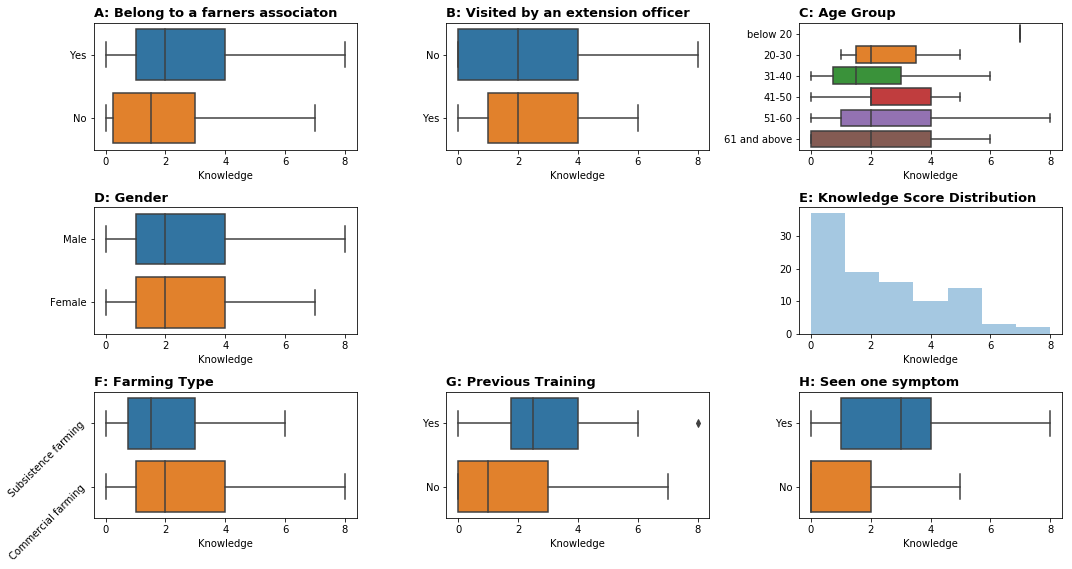

In [101]:
plt.figure(figsize=(15,8))

plt.subplot(3, 3, 1)
sns.boxplot(data=data, x='Knowledge', y='V1')
plt.ylabel("")
plt.title('A: Belong to a farners associaton', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,2)
sns.boxplot(data=data, x='Knowledge', y='V3')
plt.ylabel("")
plt.title('B: Visited by an extension officer', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,3)
sns.boxplot(data=data, x='Knowledge', y='V4', 
            order=['below 20', '20-30','31-40','41-50','51-60','61 and above'])
plt.ylabel("")
plt.title('C: Age Group', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,4)
sns.boxplot(data=data, x='Knowledge', y='V5')
plt.ylabel("")
plt.title('D: Gender', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,6)
sns.distplot(data['Knowledge'], kde=False)
plt.title('E: Knowledge Score Distribution', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,7)
sns.boxplot(data=data, x='Knowledge', y='V6')
plt.ylabel("")
plt.yticks(rotation= 45)
plt.title('F: Farming Type', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,8)
sns.boxplot(data=data, x='Knowledge', y='V7')
plt.ylabel("")
plt.title('G: Previous Training', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,9)
sns.boxplot(data=data, x='Knowledge', y='Seen_One')
plt.ylabel("")
plt.title('H: Seen one symptom', fontsize=13, fontweight='bold', loc='left')


plt.tight_layout()

plt.savefig('Knowledge.png', dpi=500)

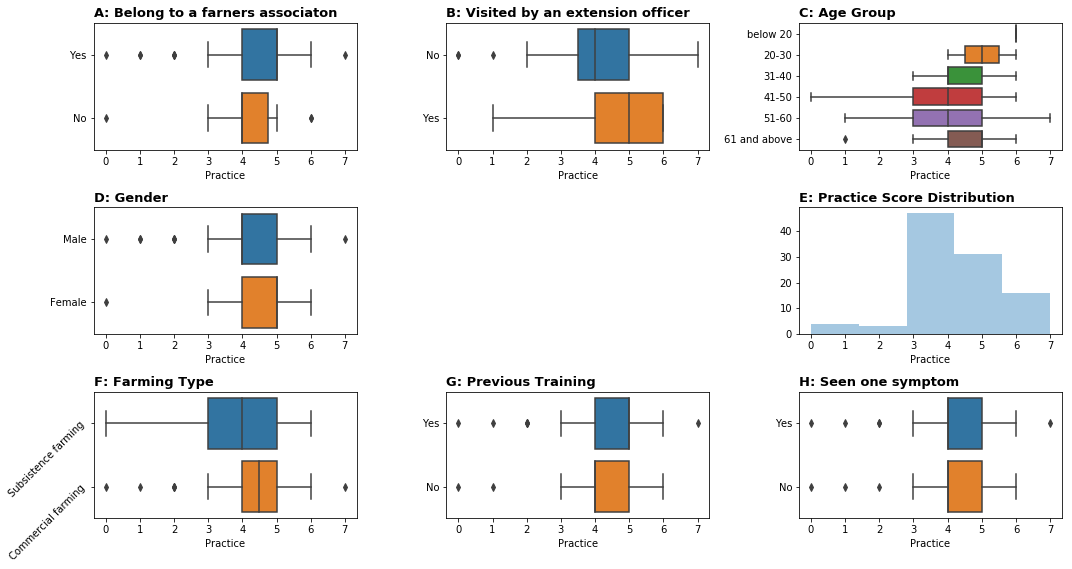

In [102]:
plt.figure(figsize=(15,8))

plt.subplot(3, 3, 1)
sns.boxplot(data=data, x='Practice', y='V1')
plt.ylabel("")
plt.title('A: Belong to a farners associaton', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,2)
sns.boxplot(data=data, x='Practice', y='V3')
plt.ylabel("")
plt.title('B: Visited by an extension officer', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,3)
sns.boxplot(data=data, x='Practice', y='V4', 
            order=['below 20', '20-30','31-40','41-50','51-60','61 and above'])
plt.ylabel("")
plt.title('C: Age Group', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,4)
sns.boxplot(data=data, x='Practice', y='V5')
plt.ylabel("")
plt.title('D: Gender', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,6)
sns.distplot(data['Practice'], bins=5, kde=False)
plt.title('E: Practice Score Distribution', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,7)
sns.boxplot(data=data, x='Practice', y='V6')
plt.ylabel("")
plt.yticks(rotation= 45)
plt.title('F: Farming Type', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,8)
sns.boxplot(data=data, x='Practice', y='V7')
plt.ylabel("")
plt.title('G: Previous Training', fontsize=13, fontweight='bold', loc='left')

plt.subplot(3,3,9)
sns.boxplot(data=data, x='Practice', y='Seen_One')
plt.ylabel("")
plt.title('H: Seen one symptom', fontsize=13, fontweight='bold', loc='left')


plt.tight_layout()

plt.savefig('Practice.png', dpi=500)